In [1]:
import os
import fnmatch
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "purple", 
                                                        "orange", "royalblue", "limegreen", 
                                                        "blueviolet","darkorange", "tomato",
                                                        "red"]) 

# Chirality evolution by changing theta

In the following script, I will merge all the chirality evolution data of different theta values. 

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Analysis"

In [3]:
def read_tot_chirality_data(directory = str, filename = str):
    
    keys_chi = []
    Tot_chi = []
    for file in os.listdir(data_directory):
        if fnmatch.fnmatch(file,filename):
            print(file[19:-4])
            
            df = pd.read_csv(os.path.join(data_directory,file),sep = '\t', index_col = [0])
            
            Tot_chi.append(df)
            keys_chi.append(float(file[19:-4]))

    Chi_exp = pd.concat(Tot_chi, keys = keys_chi)
    Chi_exp.index.names = ['Exp', 'frame']
    
    return Chi_exp

In [4]:
chi = read_tot_chirality_data(data_directory, 'Tot_chirality_theta*.dat')
chi

21
10
30
16
26
5


abs_C       err  time(s)  field(mT)
Exp  frame                                         
21.0 0       0.375537  0.024416      0.0      0.000
     5000    0.375632  0.024423     50.0      0.625
     10000   0.374842  0.024365    100.0      1.250
     15000   0.375347  0.024390    150.0      1.875
     20000   0.375263  0.024401    200.0      2.500
...               ...       ...      ...        ...
5.0  230000  0.412740  0.026080      NaN        NaN
     235000  0.411421  0.026028      NaN        NaN
     240000  0.411396  0.026085      NaN        NaN
     245000  0.413421  0.025978      NaN        NaN
     250000  0.410319  0.025920      NaN        NaN

[306 rows x 4 columns]

In [5]:
chi = chi.sort_values(by=['Exp'])

In [6]:
chi['time'] = chi.index.get_level_values('frame')/100

In [7]:
chi['mT'] = chi['time']*25/2500

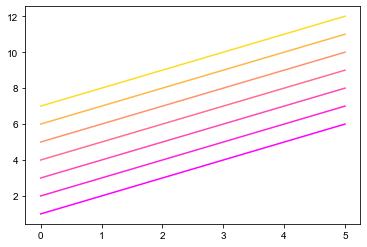

In [8]:
x = [1,2,3,4,5,6]
n = 7 # Number of colors
new_colors = [plt.get_cmap('spring')(1. * i/n) for i in range(n)]

plt.rc('axes', 
       prop_cycle=(mpl.cycler('color', new_colors)))

for i in range(7):
    plt.plot([_ + i for _ in x])

5.0
10.0
16.0
21.0
26.0
30.0


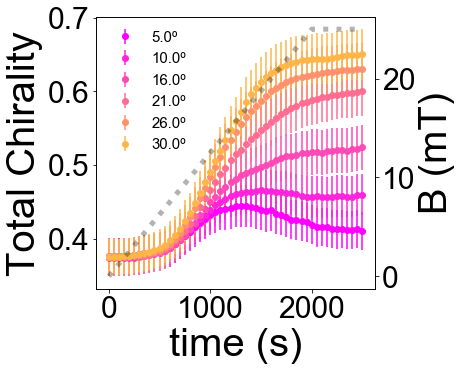

In [9]:
fig, ax1 = plt.subplots(figsize=(5,5))

for typ_m, mtype in chi.groupby(level = 0):
    
    print(typ_m)
    C = ax1.errorbar(mtype.index.get_level_values('frame')/100, mtype["abs_C"],yerr = mtype["err"], fmt ='o', label = str(typ_m)+'º')

ax1.legend(fontsize = 15,  frameon = False)
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Total Chirality', size = 40)
ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30) 

ax2 = ax1.twinx()

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.3, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)
plt.savefig('Chirality_diff_theta.png', bbox_inches='tight')

In [10]:
chi.to_csv('chirality_vs_time.dat', sep = '\t')

In [11]:
last_frame = chi.query('frame == 250000')

No handles with labels found to put in legend.


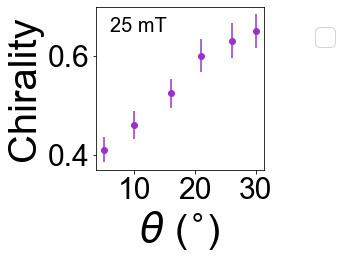

In [16]:
fig, ax1 = plt.subplots(figsize=(3,3))
plt.errorbar(last_frame.index.get_level_values('Exp'), last_frame.abs_C,yerr = last_frame['err'],fmt ='o', c = 'darkorchid')
plt.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
plt.xlabel(r'$\theta$ ($^{\circ}$)', size = 40)
plt.ylabel('Chirality', size = 40)
plt.tick_params(axis='y', labelsize=30)
plt.tick_params(axis='x', labelsize=30) 
plt.text(x = 6, y = 0.65, s ='25 mT', size = 20)
plt.savefig('Chirality_vs_theta.png',  bbox_inches='tight')

In [13]:
last_frame.to_csv('chirality_vs_theta.dat', sep = '\t')